In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
#read in feature counts file
read_counts = pd.read_csv('2.2a_ex1_featurecounts.tsv',
                          sep="\t",
                          header=0,
                         comment='#')
read_counts.head()

,Geneid,Chr,Start,End,Strand,Length,bam/RS411-nasc-1.bam,bam/RS411-nasc-2.bam,bam/RS411-nasc-3.bam,bam/SEM-nasc-1.bam,bam/SEM-nasc-2.bam,bam/SEM-nasc-3.bam
0,DDX11L1,chr1;chr1;chr1,11874;12613;13221,12227;12721;14409,+;+;+,1652,9,6,8,8,8,6
1,WASH7P,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,14362;14970;15796;16607;16858;17233;17606;1791...,14829;15038;15947;16765;17055;17368;17742;1806...,-;-;-;-;-;-;-;-;-;-;-,1769,132,86,105,93,102,135
2,FAM138A,chr1;chr1;chr1;chr19;chr19;chr19,34611;35277;35721;76220;76886;77330,35174;35481;36081;76783;77090;77690,-;-;-;-;-;-,2260,0,0,0,0,0,0
3,FAM138F,chr1;chr1;chr1;chr19;chr19;chr19,34611;35277;35721;76220;76886;77330,35174;35481;36081;76783;77090;77690,-;-;-;-;-;-,2260,0,0,0,0,0,0
4,OR4F5,chr1,69091,70008,+,918,0,0,0,0,0,0


In [4]:
#dropping columns Chr, Start, End, Strand and Length, axis 1 indicates columns
read_counts_df = read_counts.drop(['Chr', 'Start', 'End', 'Strand', 'Length'], axis=1)

In [5]:
read_counts_df

,Geneid,bam/RS411-nasc-1.bam,bam/RS411-nasc-2.bam,bam/RS411-nasc-3.bam,bam/SEM-nasc-1.bam,bam/SEM-nasc-2.bam,bam/SEM-nasc-3.bam
0,DDX11L1,9,6,8,8,8,6
1,WASH7P,132,86,105,93,102,135
2,FAM138A,0,0,0,0,0,0
3,FAM138F,0,0,0,0,0,0
4,OR4F5,0,0,0,0,0,0
...,...,...,...,...,...,...,...
23705,CDY1B,0,0,0,0,0,0
23706,CDY1,0,0,0,0,0,0
23707,CSPG4P1Y,0,0,0,0,0,0
23708,GOLGA2P3Y,0,0,0,0,0,0


In [9]:
#rename columns
read_counts_renamed = read_counts_df.rename(columns={"bam/RS411-nasc-1.bam":"RS411_rep1", "bam/RS411-nasc-2.bam":"RS411_rep2", "bam/RS411-nasc-3.bam":"RS411_rep3", "bam/SEM-nasc-1.bam":"SEM_rep1", "bam/SEM-nasc-2.bam":"SEM_rep2", "bam/SEM-nasc-3.bam":"SEM_rep3"})

In [10]:
read_counts_renamed

,Geneid,RS411_rep1,RS411_rep2,RS411_rep3,SEM_rep1,SEM_rep2,SEM_rep3
0,DDX11L1,9,6,8,8,8,6
1,WASH7P,132,86,105,93,102,135
2,FAM138A,0,0,0,0,0,0
3,FAM138F,0,0,0,0,0,0
4,OR4F5,0,0,0,0,0,0
...,...,...,...,...,...,...,...
23705,CDY1B,0,0,0,0,0,0
23706,CDY1,0,0,0,0,0,0
23707,CSPG4P1Y,0,0,0,0,0,0
23708,GOLGA2P3Y,0,0,0,0,0,0


In [12]:
#filter out genes with no counts

read_counts_filtered = read_counts_renamed.query("RS411_rep1 > 0 & RS411_rep2 > 0 & RS411_rep3 > 0 & SEM_rep1 > 0 & SEM_rep2 > 0 & SEM_rep3 > 0")

In [13]:
read_counts_filtered

,Geneid,RS411_rep1,RS411_rep2,RS411_rep3,SEM_rep1,SEM_rep2,SEM_rep3
0,DDX11L1,9,6,8,8,8,6
1,WASH7P,132,86,105,93,102,135
8,LOC100133331,86,72,73,69,26,62
12,LOC100288069,58,46,52,36,55,32
13,LINC00115,69,74,86,69,75,77
...,...,...,...,...,...,...,...
23602,TMLHE-AS1,3,3,1,5,3,4
23604,TMLHE,84,56,57,78,93,86
23607,IL9R,4,1,1,8,2,1
23629,PRKY,4,3,4,1,1,1


In [19]:
#set gene id as the index so that it becomes an index rather than a column and isnt included in the scatterplot

read_counts_filtered.set_index("Geneid")

KeyError: "None of ['Geneid'] are in the columns"

In [20]:
read_counts_filtered

,RS411_rep1,RS411_rep2,RS411_rep3,SEM_rep1,SEM_rep2,SEM_rep3
Geneid,,,,,,
DDX11L1,9,6,8,8,8,6
WASH7P,132,86,105,93,102,135
LOC100133331,86,72,73,69,26,62
LOC100288069,58,46,52,36,55,32
LINC00115,69,74,86,69,75,77
...,...,...,...,...,...,...
TMLHE-AS1,3,3,1,5,3,4
TMLHE,84,56,57,78,93,86
IL9R,4,1,1,8,2,1


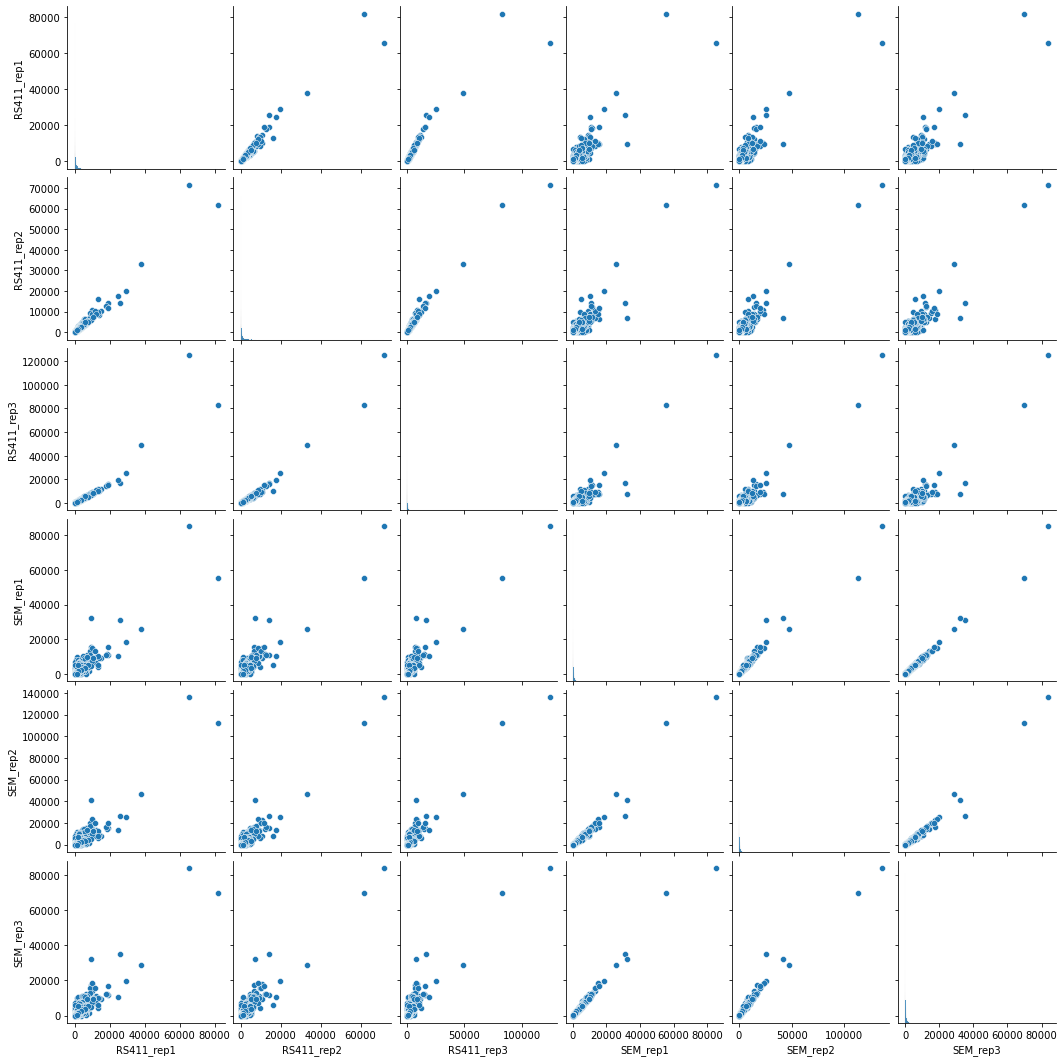

In [21]:
#generate a scatter plot of the filtered read counts
sns.pairplot(read_counts_filtered)

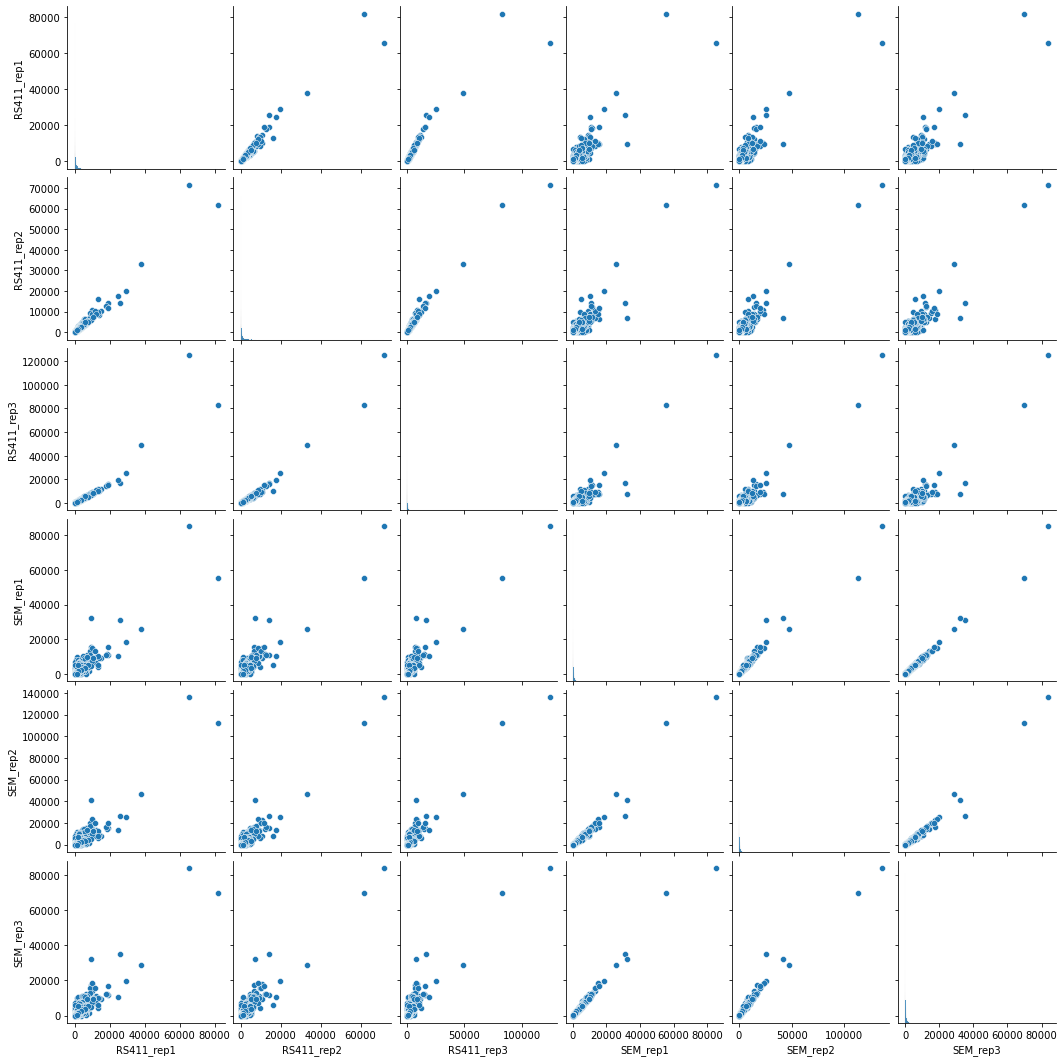

In [22]:
sns.pairplot(read_counts_filtered, diag_kind="hist")